### Data
http://s3.amazonaws.com/datashader-data/nyc_crime.zip

### Import

In [3]:
import pandas as pd
import datashader as ds
import datashader.transfer_functions as tf

from functools import partial
from datashader.utils import export_image
from datashader.colors import colormap_select, inferno

### Daten einlesen

In [4]:
df = pd.read_csv('nyc_crime.csv')

In [5]:
df_2 = df['Location 1']
x = []
y = []
i = 0
while i < len(df_2):
    value = df_2[i].replace("(", "")
    value = value.replace(")", "")
    value = value.split(", ")
    x.append(float(value[0]))
    y.append(float(value[1]))
    i = i + 1

df['LAT'] = x
df['LON'] = y

In [6]:
print (len(df))
df.head()

1123464


,OBJECTID,Identifier,Occurrence Date,Day of Week,Occurrence Month,Occurrence Day,Occurrence Year,Occurrence Hour,CompStat Month,CompStat Day,...,Offense Classification,Sector,Precinct,Borough,Jurisdiction,XCoordinate,YCoordinate,Location 1,LAT,LON
0,1.0,f070032d,09/06/1940 07:30:00 PM,Friday,Sep,6.0,1940.0,19.0,9.0,7.0,...,FELONY,D,66.0,BROOKLYN,N.Y. POLICE DEPT,987478.0,166141.0,"(40.6227027620001, -73.9883732929999)",40.622703,-73.988373
1,2.0,c6245d4d,12/14/1968 12:20:00 AM,Saturday,Dec,14.0,1968.0,0.0,12.0,14.0,...,FELONY,G,28.0,MANHATTAN,N.Y. POLICE DEPT,996470.0,232106.0,"(40.8037530600001, -73.955861904)",40.803753,-73.955862
2,3.0,716dbc6f,10/30/1970 03:30:00 PM,Friday,Oct,30.0,1970.0,15.0,10.0,31.0,...,FELONY,H,84.0,BROOKLYN,N.Y. POLICE DEPT,986508.0,190249.0,"(40.688874254, -73.9918594329999)",40.688874,-73.991859
3,4.0,638cd7b7,07/18/1972 11:00:00 PM,Tuesday,Jul,18.0,1972.0,23.0,7.0,19.0,...,FELONY,F,73.0,BROOKLYN,N.Y. POLICE DEPT,1005876.0,182440.0,"(40.6674141890001, -73.9220463899999)",40.667414,-73.922046
4,5.0,6e410287,05/21/1987 12:01:00 AM,Thursday,May,21.0,1987.0,0.0,5.0,28.0,...,FELONY,K,75.0,BROOKLYN,N.Y. POLICE DEPT,1017958.0,182266.0,"(40.6668988440001, -73.878495425)",40.666899,-73.878495


### PLOT

In [7]:
background = "black"
export = partial(export_image, export_path="export", background=background)
cm = partial(colormap_select, reverse=(background=="black"))

C:\ProgramData\Anaconda3\lib\site-packages\datashader\transfer_functions.py:162: RuntimeWarning: invalid value encountered in log1p
  _interpolate_lookup = {'log': lambda d, m: np.log1p(np.where(m, np.nan, d)),


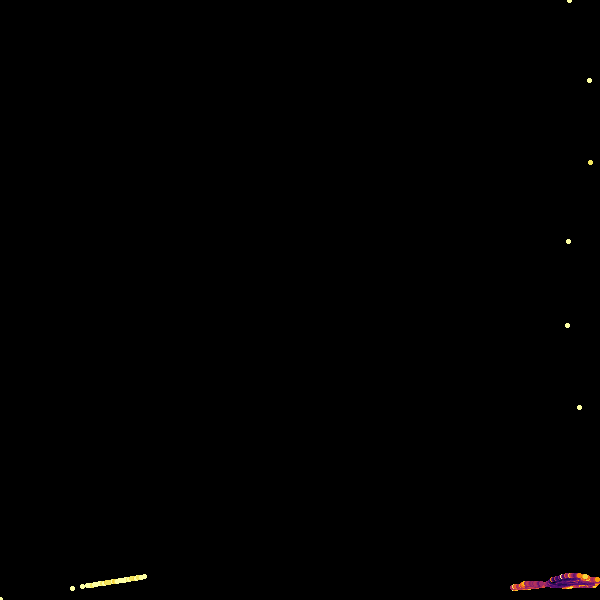

In [8]:
cvs = ds.Canvas()
agg = cvs.points(df, 'LON', 'LAT')
view = tf.shade(agg, cmap = cm(inferno), how='log')
export(tf.spread(view, px=2), 'NYC Crime')

C:\ProgramData\Anaconda3\lib\site-packages\datashader\transfer_functions.py:162: RuntimeWarning: invalid value encountered in log1p
  _interpolate_lookup = {'log': lambda d, m: np.log1p(np.where(m, np.nan, d)),


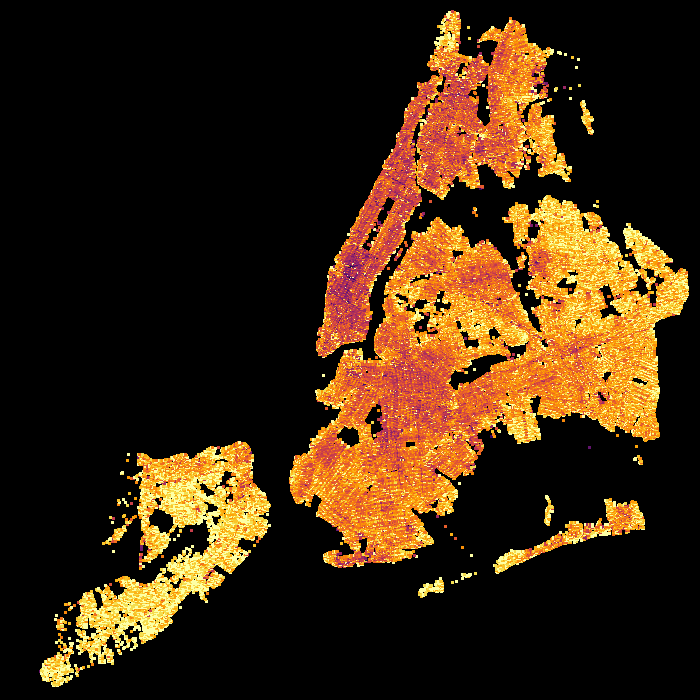

In [9]:
NewYorkCity = (( -74.29,  -73.69), (40.49, 40.92))

cvs = ds.Canvas(700, 700, *NewYorkCity)
agg = cvs.points(df, 'LON', 'LAT')
view = tf.shade(agg, cmap = cm(inferno), how='log')
export(tf.spread(view, px=1), 'NYC Crime')